# Proyecto Final 🚗

**Integrantes:** Sebastián Rodríguez, Juan José Rodríguez y Luisa Tapiero

La idea de este proyecto es predecir la calificación de riesgo del seguro de un coche, así como caracterizar los diferentes segmentos de la población.

Los campos de dataset son los siguientes:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

**Limpieza y EDA**

Cargamos los datos y librerías necesarias. Asimismo, visualizamos los datos iniciales y resumidos.

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


ruta_archivo = 'imports-85.data'
separador = ','
df = pd.read_csv(ruta_archivo,sep=",",header=None)
df.head()

0    1            2    3    4     5            6    7      8     9   ...  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    16    17    18    19    20   21    22  23  24     25  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  

[5 rows x 26 columns]

Como el dataframe no tiene los nombres de las columnas, entonces procedemos a asignarles a cada una

In [221]:
colnames = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
         "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size","fuel-system","bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns=colnames
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

Revisamos la información del dataframe para observar el tipo de cada variable (dependiente e independientes). Además, obtenemos la información acerca de datos no nulos para cada variable y conocemos la cantidad de datos faltantes por columna.

- Hay variables con tipos que no corresponden (symboling, normalized-losses, wheel-base, length, width, height,curb-weight, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price)
- No hay datos nulos ni faltantes

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Con esta tabla confirmamos los tipos de variables que no corresponden para bastantes de las columnas.
- Encontramos que hay variables con valores "?", este problema podría aparecer en otras variables categóricas.
- El número de valores posibles no corresponde para las variables:
num-of-doors (3 en vez de 2)

In [223]:
df.describe(include='all')

symboling normalized-losses    make fuel-type aspiration  \
count   205.000000               205     205       205        205   
unique         NaN                52      22         2          2   
top            NaN                 ?  toyota       gas        std   
freq           NaN                41      32       185        168   
mean      0.834146               NaN     NaN       NaN        NaN   
std       1.245307               NaN     NaN       NaN        NaN   
min      -2.000000               NaN     NaN       NaN        NaN   
25%       0.000000               NaN     NaN       NaN        NaN   
50%       1.000000               NaN     NaN       NaN        NaN   
75%       2.000000               NaN     NaN       NaN        NaN   
max       3.000000               NaN     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
count           205        205          205             205  205.000000  ...   
unique            3          5            3               2         NaN  ...   
top            four      sedan          fwd           front         NaN  ...   
freq            114         96          120             202         NaN  ...   
mean            NaN        NaN          NaN             NaN   98.756585  ...   
std             NaN        NaN          NaN             NaN    6.021776  ...   
min             NaN        NaN          NaN             NaN   86.600000  ...   
25%             NaN        NaN          NaN             NaN   94.500000  ...   
50%             NaN        NaN          NaN             NaN   97.000000  ...   
75%             NaN        NaN          NaN             NaN  102.400000  ...   
max             NaN        NaN          NaN             NaN  120.900000  ...   

        engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
count    205.000000          205   205     205        205.000000        205   
unique          NaN            8    39      37               NaN         60   
top             NaN         mpfi  3.62    3.40               NaN         68   
freq            NaN           94    23      20               NaN         19   
mean     126.907317          NaN   NaN     NaN         10.142537        NaN   
std       41.642693          NaN   NaN     NaN          3.972040        NaN   
min       61.000000          NaN   NaN     NaN          7.000000        NaN   
25%       97.000000          NaN   NaN     NaN          8.600000        NaN   
50%      120.000000          NaN   NaN     NaN          9.000000        NaN   
75%      141.000000          NaN   NaN     NaN          9.400000        NaN   
max      326.000000          NaN   NaN     NaN         23.000000        NaN   

        peak-rpm    city-mpg highway-mpg price  
count        205  205.000000  205.000000   205  
unique        24         NaN         NaN   187  
top         5500         NaN         NaN     ?  
freq          37         NaN         NaN     4  
mean         NaN   25.219512   30.751220   NaN  
std          NaN    6.542142    6.886443   NaN  
min          NaN   13.000000   16.000000   NaN  
25%          NaN   19.000000   25.000000   NaN  
50%          NaN   24.000000   30.000000   NaN  
75%          NaN   30.000000   34.000000   NaN  
max          NaN   49.000000   54.000000   NaN  

[11 rows x 26 columns]

###Limpieza: valores inválidos y tipos de columnas
Varias de los atributos del dataset fueron leidos con el tipo de datos que no correspondía:

"symboling" es una variable categórica codificada con valores "-3", "-2","-1", "0", "1", "2" y "3"

'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price' son variables numéricas que aparece como categórica

Empezamos por convertir la variable numérica incorrecta (symboling) a categórica

In [224]:
cols = ['symboling']
for col in cols:
    df[col] = df[col].astype(str)

Verificamos cuáles son las variables categóricas que tienen valores de ?

- Encontramos que la variable "normalized-losses" tiene muchos valores "?"
- Los demás variables no tienen muchos valores "?", lo que permite que puedan ser reemplazadas por media o moda, dependiendo de su tipo.

In [225]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")



Existen 0 valores en symboling con el valor ?
Existen 41 valores en normalized-losses con el valor ?
Existen 0 valores en make con el valor ?
Existen 0 valores en fuel-type con el valor ?
Existen 0 valores en aspiration con el valor ?
Existen 2 valores en num-of-doors con el valor ?
Existen 0 valores en body-style con el valor ?
Existen 0 valores en drive-wheels con el valor ?
Existen 0 valores en engine-location con el valor ?
Existen 0 valores en engine-type con el valor ?
Existen 0 valores en num-of-cylinders con el valor ?
Existen 0 valores en fuel-system con el valor ?
Existen 4 valores en bore con el valor ?
Existen 4 valores en stroke con el valor ?
Existen 2 valores en horsepower con el valor ?
Existen 2 valores en peak-rpm con el valor ?
Existen 4 valores en price con el valor ?


Teniendo en cuenta la cantidad de valores "?" que se encuentran en la variable normalized-losses, tomamos la decisión de eliminarla, puesto que consideramos que una imputación de valores faltantes es poco fiable y resultaría en una variable poco relevante y con sesgos.

In [226]:
df.drop('normalized-losses', axis=1, inplace=True)

Procedemos a convertir los valores "?" a NaN, ya que si no lo hacemos, las variables numericas que han sido asignadas como categorícas, no podrán ser convertidas a número

In [227]:
df.replace('?',np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

In [228]:
#se procede a cambiar las variables númericas que se ha identificado como object

columnas_numericas = ['wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df[columnas_numericas] = df[columnas_numericas].astype(float)

Ahora para cubrir esos valores "?" que aparecen en algunas variables númericas, procedemos a calcular el promedio de cada variable y así asignarlo a esos valores "?"

In [229]:
#Se calcula el promedio de los datos faltantes de price para también adherirlos como valor de estos datos

promedio_price_faltantes = df['price'].mean()
promedio_stroke_faltantes = df['stroke'].mean()
promedio_bore_faltantes = df['bore'].mean()
promedio_horsepower_faltantes = df['horsepower'].mean()
promedio_peakrpm_faltantes = df['peak-rpm'].mean()

df['price'].fillna(promedio_price_faltantes, inplace=True)
df['stroke'].fillna(promedio_stroke_faltantes, inplace=True)
df['bore'].fillna(promedio_bore_faltantes, inplace=True)
df['horsepower'].fillna(promedio_horsepower_faltantes, inplace=True)
df['peak-rpm'].fillna(promedio_peakrpm_faltantes, inplace=True)


print("El promedio de la columna 'price' es:", promedio_price_faltantes)
print("El promedio de la columna 'stroke' es:", promedio_stroke_faltantes)
print("El promedio de la columna 'bore' es:", promedio_bore_faltantes)
print("El promedio de la columna 'peak-rpm' es:", promedio_horsepower_faltantes)
print("El promedio de la columna 'horsepower' es:", promedio_peakrpm_faltantes)

El promedio de la columna 'price' es: 13285.025906735751
El promedio de la columna 'stroke' es: 3.2488601036269364
El promedio de la columna 'bore' es: 3.3306217616580307
El promedio de la columna 'peak-rpm' es: 103.48186528497409
El promedio de la columna 'horsepower' es: 5099.740932642487


Para cubrir los valores "?" de la variable categorica num-of-doors, decidimos calcular la moda de la variable y asignarla a esos valores "?"

In [230]:
# Calcula la moda de la columna "num-of-doors"
moda = df['num-of-doors'].mode()[0]

# Reemplaza los valores faltantes con la moda
df['num-of-doors'].fillna(moda, inplace=True)

Aquí confirmamos que ya no hay valores "?" en ninguna variable categoríca

In [231]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")


Existen 0 valores en symboling con el valor ?
Existen 0 valores en make con el valor ?
Existen 0 valores en fuel-type con el valor ?
Existen 0 valores en aspiration con el valor ?
Existen 0 valores en num-of-doors con el valor ?
Existen 0 valores en body-style con el valor ?
Existen 0 valores en drive-wheels con el valor ?
Existen 0 valores en engine-location con el valor ?
Existen 0 valores en engine-type con el valor ?
Existen 0 valores en num-of-cylinders con el valor ?
Existen 0 valores en fuel-system con el valor ?


Con esta gráfica confirmamos que no hay valores nulos en ninguna de las variables

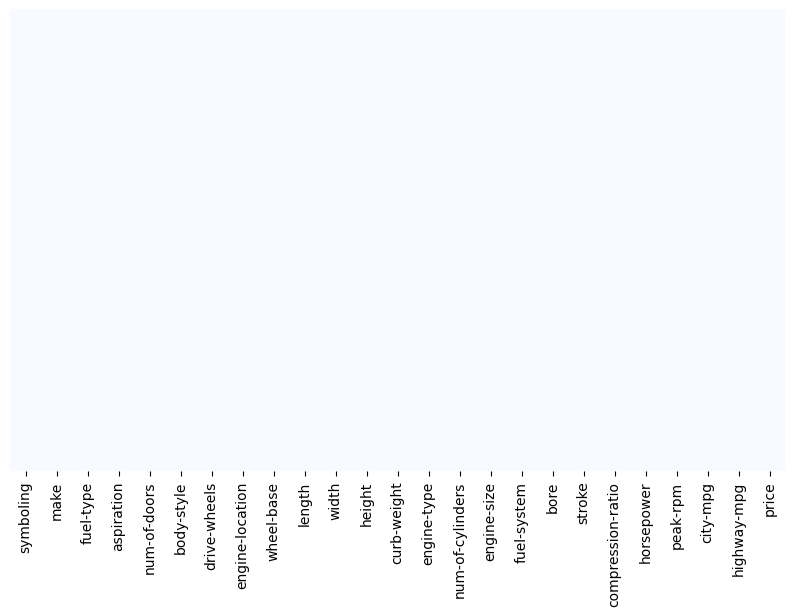

In [232]:
# Datos faltantes y su ubicación dibujados en la gráfica

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

###Limpieza Búsqueda de excepciones

**Mapa de calor**

Según los datos proporcionados en la matriz de correlación o mapa de calor que se muestra a continuación, podemos observar algunas tendencias importantes. En primer lugar, en la diagonal principal, encontramos una serie de unos, lo que indica que la correlación de cada variable consigo misma es perfecta. Además, podemos notar que la mayoría de las variables tienen correlaciones considerablemente altas, excepto en los casos de "stroke," "horsepower," y "city-mpg," donde las correlaciones son mucho más cercanas a cero. Esto sugiere que estas variables podrían no aportar significativamente al modelo, ya que no explican adecuadamente la variable dependiente. Esta consideración podría convertirse en un factor crucial al decidir si incluir o no estas variables en el modelo.

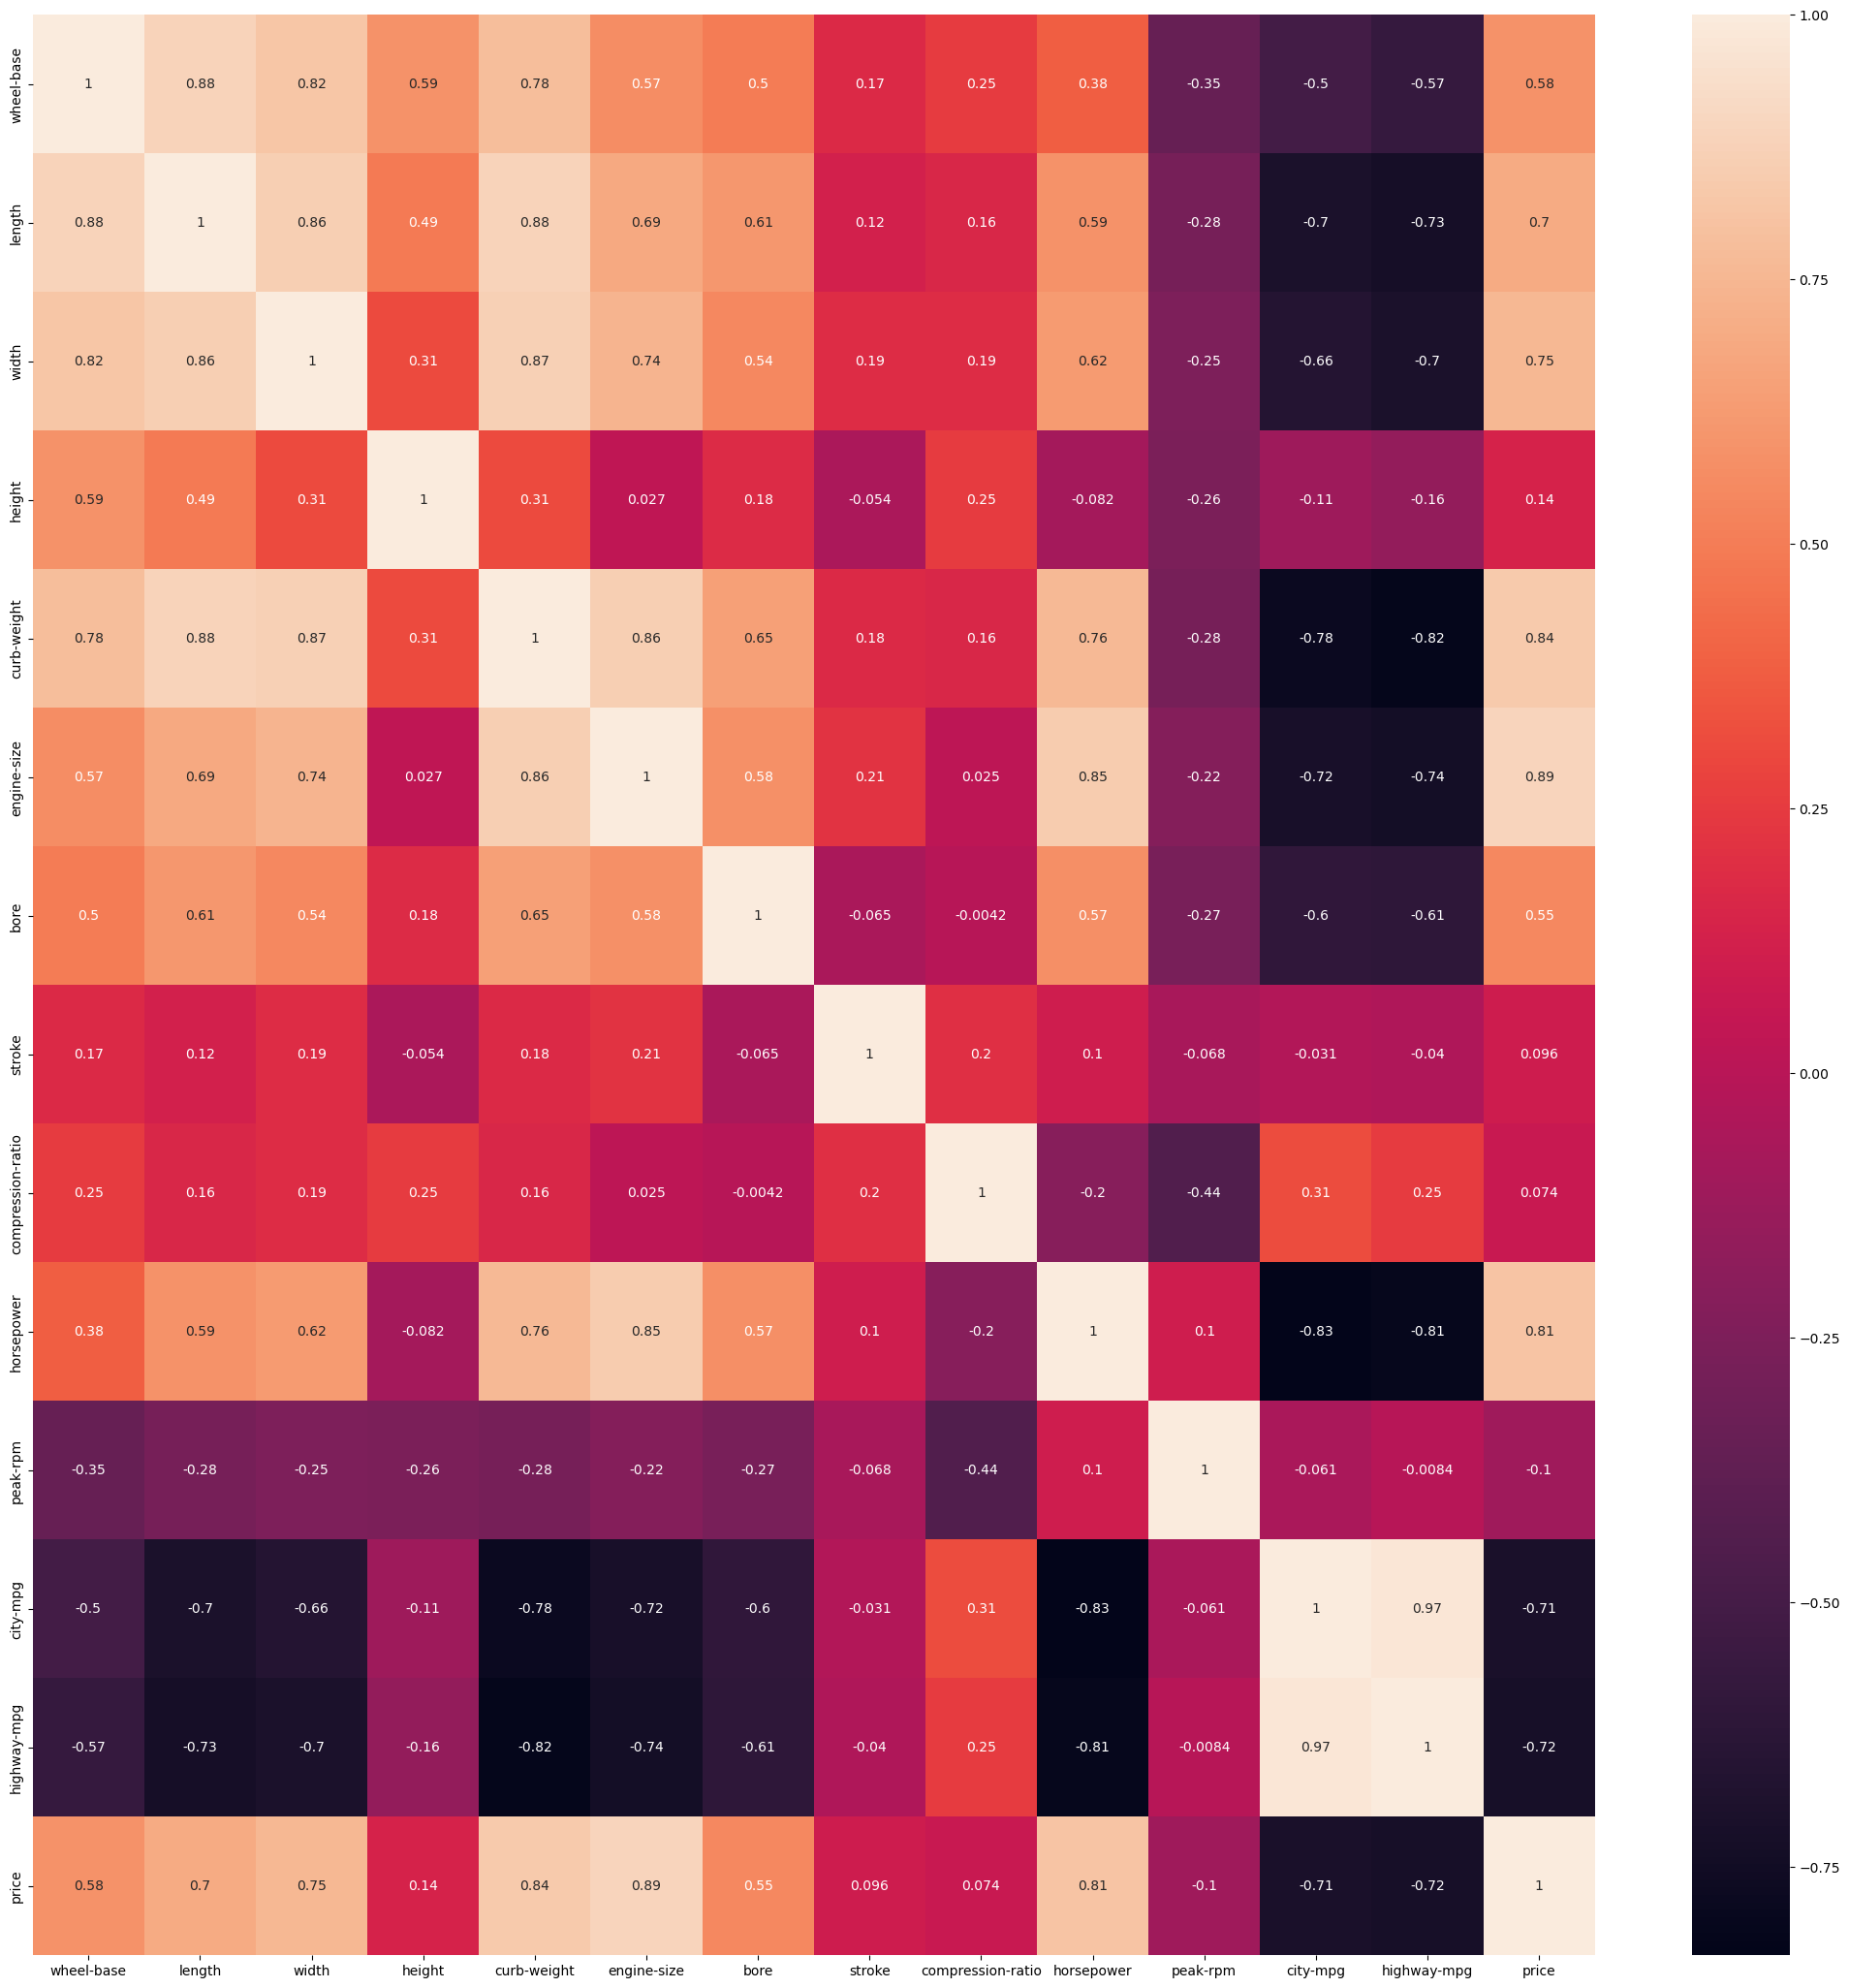

In [233]:
# Matriz de correlación entre cada par de variables

plt.figure(figsize = (26,26))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

**Boxplots**

En estos boxplots que representan la variable dependiente en función de las variables independientes, podemos observar, además de los valores atípicos, la relación que existe entre estas variables. Por ejemplo, en el primer gráfico, tenemos las variables "symboling" y "Wheel-base", las cuales parecen indicar una relación entre ellas. Esta relación se puede explicar de la siguiente manera: a medida que aumenta la distancia entre los centros de las llantas delanteras y traseras (mayor "Wheel-base"), el índice de riesgo del automóvil disminuye (menor "symboling").

En este contexto, los boxplots nos ayudan a visualizar cómo la variable "symboling" cambia en relación con las diferentes variables, lo que puede ser útil para comprender mejor la relación entre estas en el contexto de la seguridad de los automóviles.

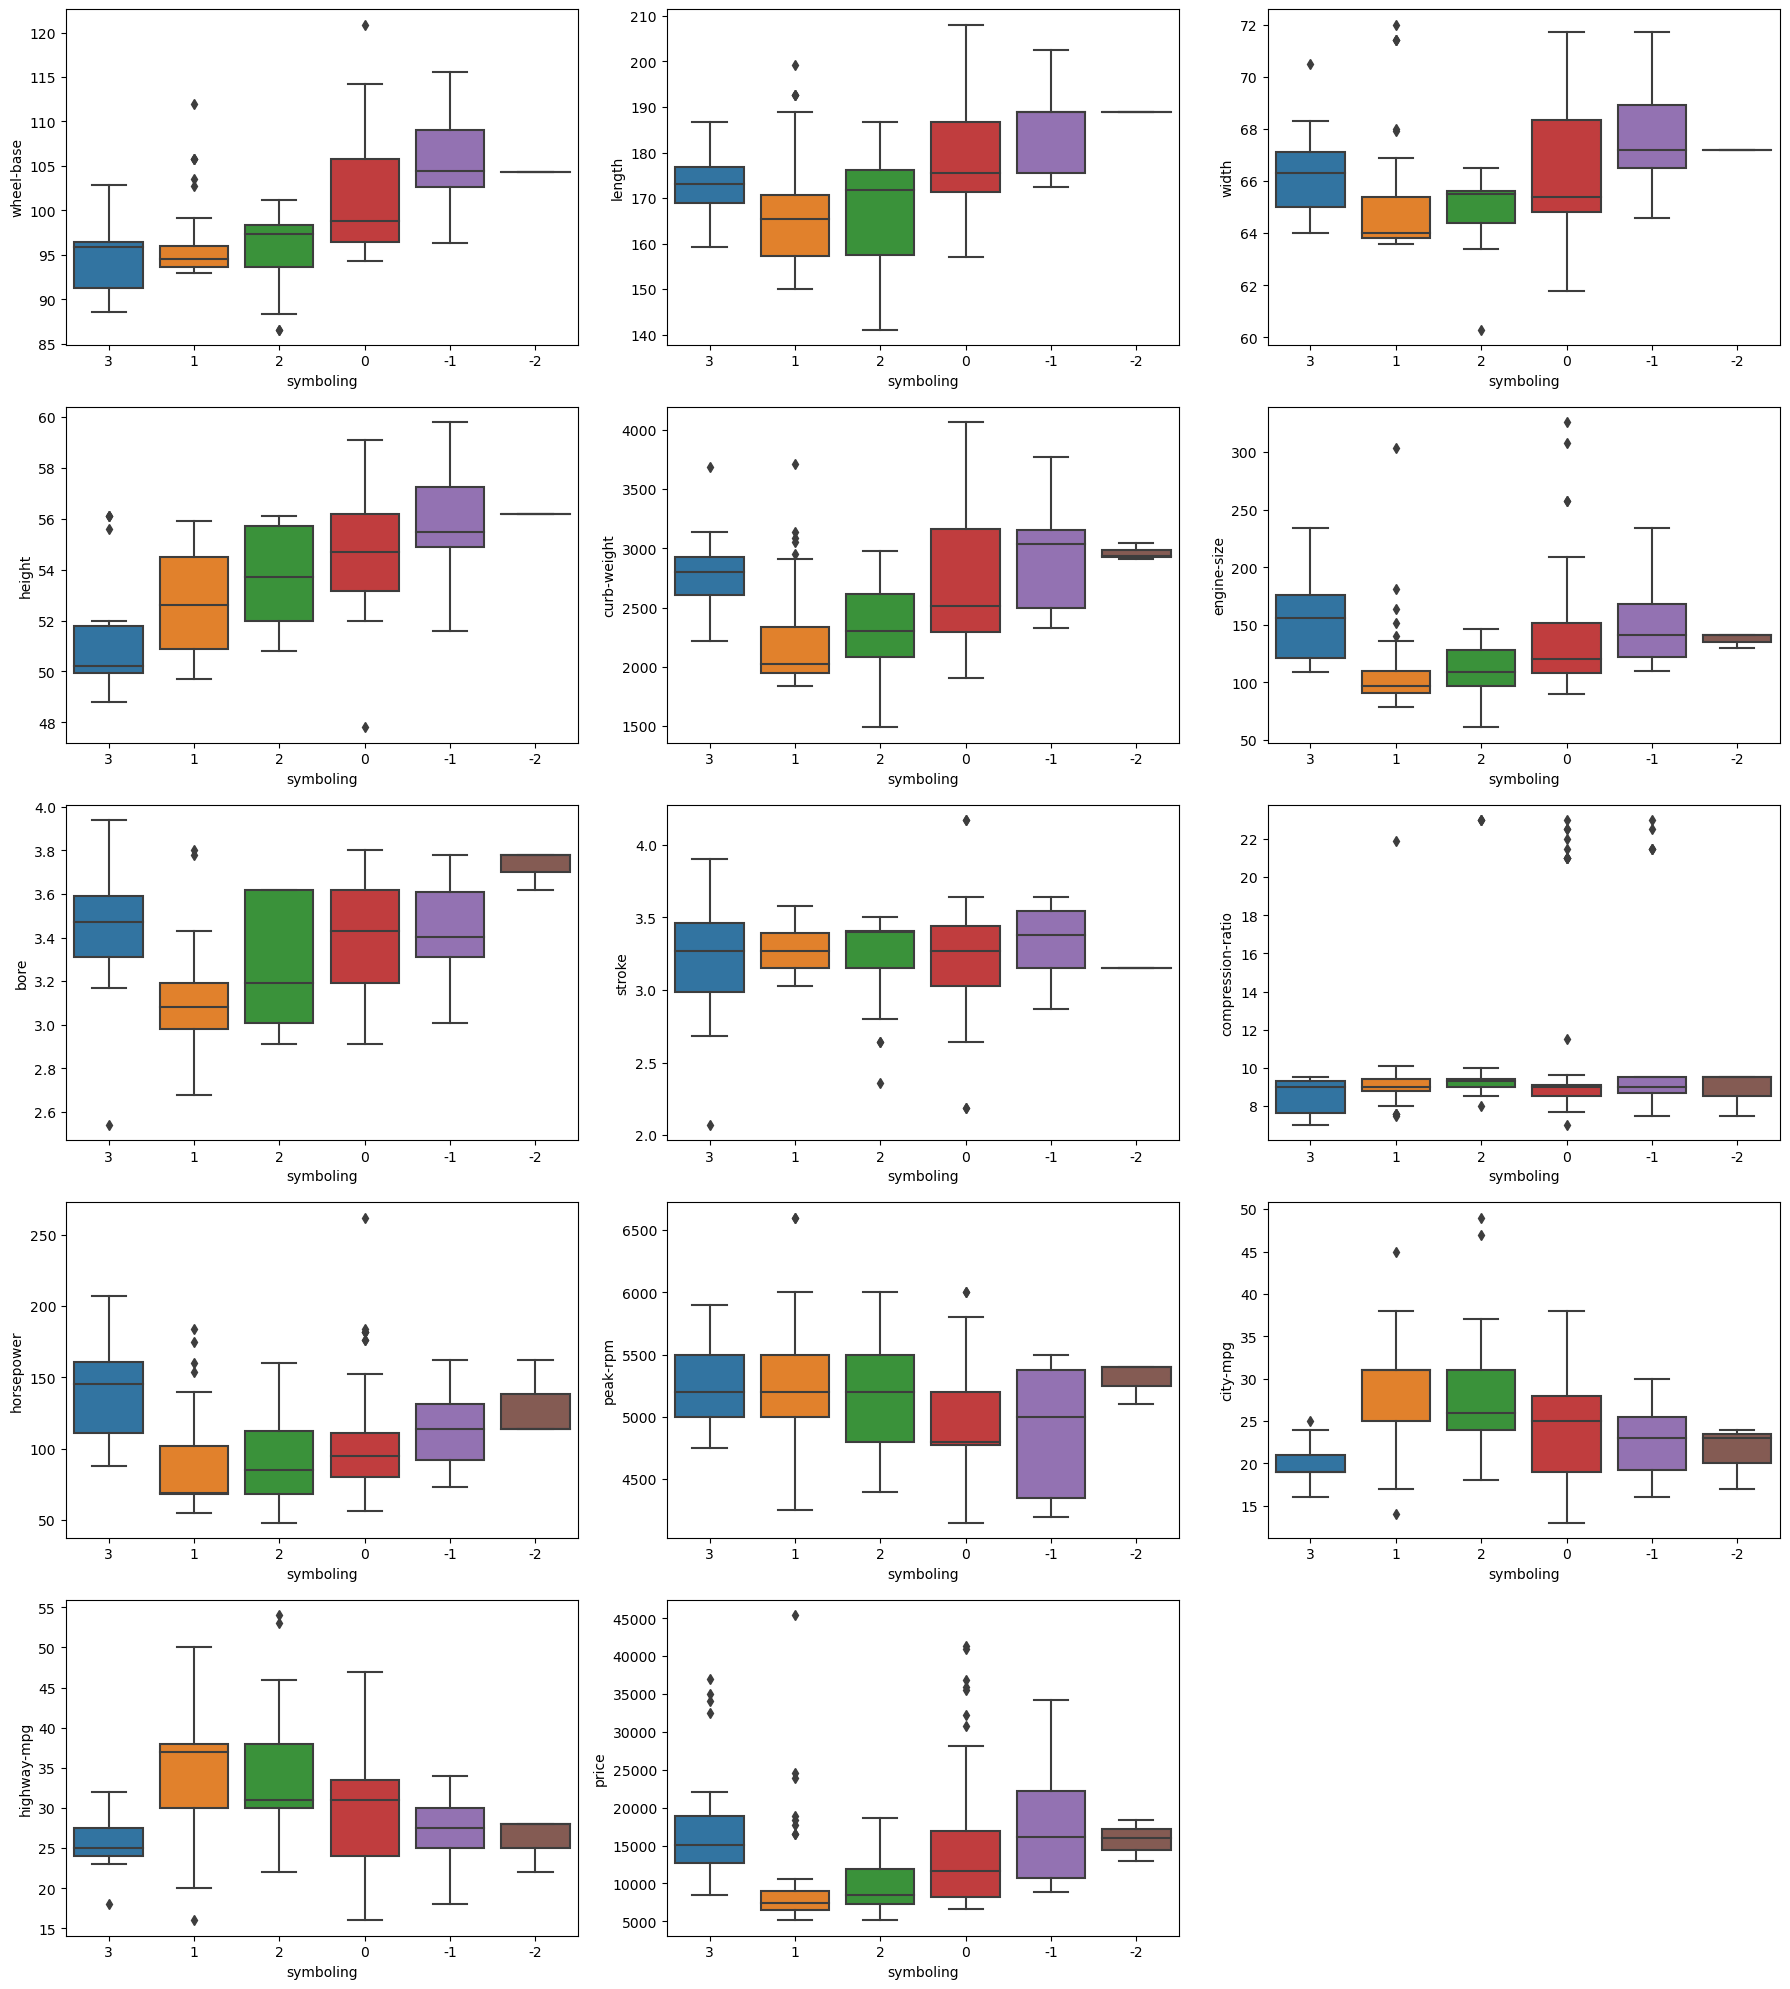

In [234]:
cols = ['wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

plt.figure(figsize=(18, 20))

num_rows = 5
num_cols = 3

for i, col in enumerate(cols, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='symboling', y=col, data=df)

plt.tight_layout() 
plt.show()


Revisamos el dataframe para comprobar si hay datos atipicos, luego procederemos a hacer una comparación de antes y después para confirmar que se eliminaron estos datos.

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    object 
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    float64
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    float64
 16  fuel-system        193 non

Para borrar los valores atipicos fue necesario realizar un filtro para indagar en los datos atipicos para luego eliminarlos

In [236]:
# Importamos las bibliotecas necesarias para la detección de valores atípicos
from scipy import stats

# Definimos una función para eliminar valores atípicos utilizando el método de Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

# Calculamos el número de filas antes de eliminar valores atípicos
num_filas_original = df.shape[0]

# Aplicamos la función para eliminar completamente los valores atípicos en las columnas numéricas
threshold = 3  # Ajustamos el umbral a 3 porque es un estándar en estadística
df = remove_outliers_zscore(df, columnas_numericas, threshold)

# Calculamos el número de filas después de eliminar valores atípicos
num_filas_sin_atipicos = df.shape[0]

# Calculamos cuántos datos atípicos se eliminaron
datos_atipicos_eliminados = num_filas_original - num_filas_sin_atipicos

print("Número de datos atípicos eliminados:", datos_atipicos_eliminados)

Número de datos atípicos eliminados: 22


Confirmamos que si se borraron los datos y a la vez contar cuantos fueron por filas

Confirmamos en el dataframe el cambio en la cantidad total de datos donde antes teniamos 193 datos, ahora con el cambio en los datos atipicos contamos con 171 datos

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          171 non-null    object 
 1   make               171 non-null    object 
 2   fuel-type          171 non-null    object 
 3   aspiration         171 non-null    object 
 4   num-of-doors       171 non-null    object 
 5   body-style         171 non-null    object 
 6   drive-wheels       171 non-null    object 
 7   engine-location    171 non-null    object 
 8   wheel-base         171 non-null    float64
 9   length             171 non-null    float64
 10  width              171 non-null    float64
 11  height             171 non-null    float64
 12  curb-weight        171 non-null    float64
 13  engine-type        171 non-null    object 
 14  num-of-cylinders   171 non-null    object 
 15  engine-size        171 non-null    float64
 16  fuel-system        171 non